Dataset Shape: (1599982, 6)
Columns in the dataset: ['target', 'ids', 'date', 'flag', 'user', 'text']


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



Missing values per column:
 target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64
Sentiment column not found. Available columns: ['target', 'ids', 'date', 'flag', 'user', 'text']


Please enter the name of the sentiment column:  target



Accuracy: 0.7891417732041238

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78    159147
           4       0.78      0.81      0.79    160850

    accuracy                           0.79    319997
   macro avg       0.79      0.79      0.79    319997
weighted avg       0.79      0.79      0.79    319997



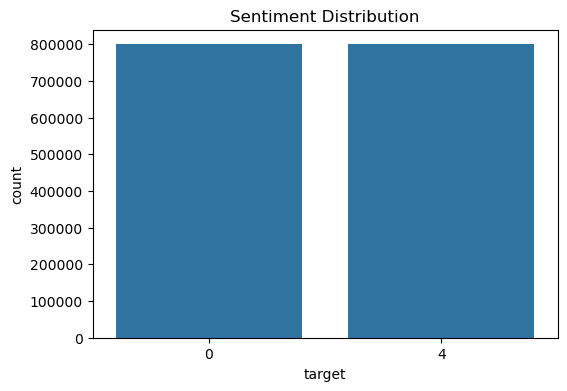

In [1]:
# First, check what columns are actually in your dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Import tkinter for file dialog
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()  # Hide the small tkinter window

file_path = filedialog.askopenfilename(title="Select your CSV file")
df = pd.read_csv(file_path)

# Step 3: Quick look at the data
print("Dataset Shape:", df.shape)
print("Columns in the dataset:", df.columns.tolist())  # Added this line to see available columns
display(df.head())

# Step 4: Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Optional: Drop missing values if necessary
df = df.dropna()

# Step 5: Identify the sentiment column - adjust this based on actual column names
# Look for columns that might contain sentiment information
sentiment_column = None
text_column = None

# Common names for sentiment columns
possible_sentiment_columns = ['sentiment', 'label', 'class', 'emotion', 'polarity']
# Common names for text columns
possible_text_columns = ['tweet', 'text', 'content', 'message']

# Find the actual column names in the dataframe
for col in possible_sentiment_columns:
    if col in df.columns:
        sentiment_column = col
        break

for col in possible_text_columns:
    if col in df.columns:
        text_column = col
        break

# If columns weren't found, ask user to specify
if sentiment_column is None:
    print("Sentiment column not found. Available columns:", df.columns.tolist())
    sentiment_column = input("Please enter the name of the sentiment column: ")
    
if text_column is None:
    print("Text column not found. Available columns:", df.columns.tolist())
    text_column = input("Please enter the name of the text column: ")

# Step 6: Encode sentiment labels if they are strings
if df[sentiment_column].dtype == 'object':
    le = LabelEncoder()
    df[sentiment_column] = le.fit_transform(df[sentiment_column])

# Step 7: Split features and target
X = df[text_column]
y = df[sentiment_column]

# For simple ML, we need numerical features: use CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

# Step 8: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Step 9: Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 10: Make predictions and evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Optional - Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df[sentiment_column])
plt.title("Sentiment Distribution")
plt.show()